This notebook creates a graph showing the rate of application signup for the Terrahacks Hackathon hosted by PACS  
To run this you need the Pandas and Matplotlib Libraries

First I import the needed modules

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

Next I import the Csv containing the data we will be using and store it into a Dataframe

In [5]:
raw = pd.read_csv("user_signup_times.csv")
raw['signup_date'] = pd.to_datetime(raw["signup_date"])
raw

,signup_date
0,2024-06-25 22:09:45.414858-04:00
1,2024-06-25 22:28:48.742851-04:00
2,2024-06-25 22:30:54.792565-04:00
3,2024-06-25 22:38:23.788281-04:00
4,2024-06-25 22:46:18.854480-04:00
...,...
98,2024-06-28 13:32:15.682978-04:00
99,2024-06-28 13:36:06.025444-04:00
100,2024-06-28 13:39:03.757774-04:00
101,2024-06-28 13:44:08.968609-04:00


I already presorted the data in chronologial order before pullin it off Supabase. Therefore I only need to create the graphs

Now to make the first graph.

In [6]:
signups = raw.resample('h', on="signup_date").size().reset_index(name="signup_count")

signups

,signup_date,signup_count
0,2024-06-25 22:00:00-04:00,7
1,2024-06-25 23:00:00-04:00,7
2,2024-06-26 00:00:00-04:00,1
3,2024-06-26 01:00:00-04:00,2
4,2024-06-26 02:00:00-04:00,2
...,...,...
59,2024-06-28 09:00:00-04:00,0
60,2024-06-28 10:00:00-04:00,2
61,2024-06-28 11:00:00-04:00,3
62,2024-06-28 12:00:00-04:00,4


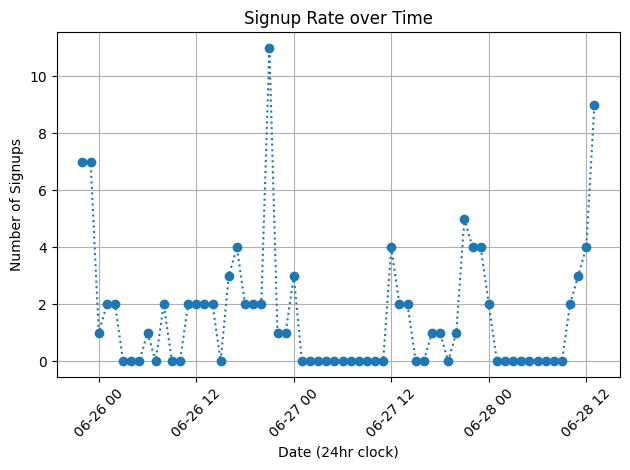

In [7]:
plt.plot(signups["signup_date"], signups["signup_count"], marker= 'o', linestyle = ':')
plt.xlabel("Date (24hr clock)")
plt.ylabel("Number of Signups")
plt.title("Signup Rate over Time")
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

This graph shows the rate of signups over a period of time that the application signups have been open. It seems to have peaked to about 11 signups in one hour on the 26th of June

Now ill create a graph showing the toal amount of signups over time

In [8]:
signup_totals = raw

signup_totals['cumulative_signups'] = range(1, len(signup_totals) + 1)

signup_totals



,signup_date,cumulative_signups
0,2024-06-25 22:09:45.414858-04:00,1
1,2024-06-25 22:28:48.742851-04:00,2
2,2024-06-25 22:30:54.792565-04:00,3
3,2024-06-25 22:38:23.788281-04:00,4
4,2024-06-25 22:46:18.854480-04:00,5
...,...,...
98,2024-06-28 13:32:15.682978-04:00,99
99,2024-06-28 13:36:06.025444-04:00,100
100,2024-06-28 13:39:03.757774-04:00,101
101,2024-06-28 13:44:08.968609-04:00,102


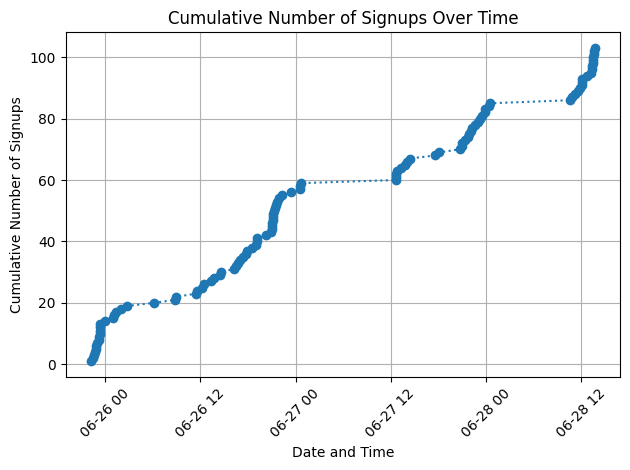

In [9]:
plt.plot(signup_totals["signup_date"],signup_totals["cumulative_signups"], marker='o', linestyle=':')
plt.xlabel('Date and Time')
plt.ylabel('Cumulative Number of Signups')
plt.title('Cumulative Number of Signups Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Graph showing number of signups over time with plots

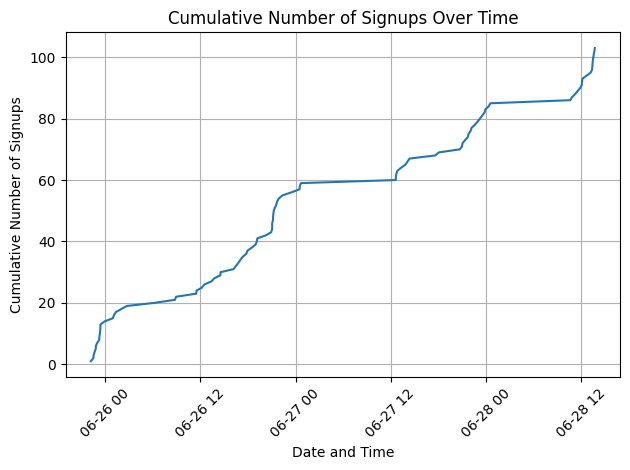

In [10]:
plt.plot(signup_totals["signup_date"],signup_totals["cumulative_signups"],linestyle='-')
plt.xlabel('Date and Time')
plt.ylabel('Cumulative Number of Signups')
plt.title('Cumulative Number of Signups Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Graph without plots to more easily visualise